In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/MyDrive/')


['IMG-20180413-WA0003.jpg',
 'IMG-20180413-WA0005.jpg',
 'IMG-20180413-WA0004.jpg',
 'IMG-20180413-WA0007.jpg',
 'IMG-20180413-WA0006.jpg',
 'IMG-20180413-WA0008.jpg',
 'IMG-20180413-WA0009.jpg',
 'IMG-20180413-WA0010.jpg',
 'IMG-20180413-WA0011.jpg',
 'IMG-20180408-WA0023.jpg',
 'IMG-20180408-WA0022.jpg',
 'IMG-20180408-WA0020.jpg',
 'IMG-20180408-WA0029.jpg',
 'IMG-20180408-WA0030.jpg',
 'IMG-20180408-WA0028.jpg',
 'IMG-20180408-WA0027.jpg',
 'IMG-20180408-WA0036.jpg',
 'IMG-20180408-WA0035.jpg',
 'IMG-20180408-WA0034.jpg',
 'IMG-20180408-WA0033.jpg',
 'IMG-20180408-WA0032.jpg',
 'IMG-20180408-WA0031.jpg',
 'IMG-20180409-WA0000.jpg',
 'IMG-20180409-WA0001.jpg',
 'IMG-20180408-WA0014.jpg',
 'IMG-20180408-WA0013.jpg',
 'IMG-20180408-WA0012.jpg',
 'IMG-20180408-WA0011.jpg',
 'IMG-20180408-WA0010.jpg',
 'IMG-20180408-WA0009.jpg',
 'IMG-20180408-WA0025.jpg',
 'IMG-20180408-WA0026.jpg',
 'IMG-20180408-WA0024.jpg',
 'IMG-20180408-WA0021.jpg',
 'IMG-20180408-WA0018.jpg',
 'IMG-20180408-WA001

In [ ]:
os.listdir('/content/drive/MyDrive/CLEAN_AIR_OS/Raw_data_files/')


['ITO_OPEN_AQ.csv',
 'RKPuram_Open_AQ.csv',
 'Pusa_Open_AQ.csv',
 'KarniSingh_Open_AQ.csv',
 'Sector11_Open_AQ.csv',
 'Jahangirpuri_Open_AQ.csv',
 'Bawana_Open_AQ.csv',
 'Pratapganj_open_AQ.csv',
 'Chandnichowk_Open_AQ.csv',
 'FIIRMS.csv',
 'ITO_2025_daily_all_pollutants.csv']

In [ ]:
import pandas as pd
import glob
import os

DATA_DIR = '/content/drive/MyDrive/CLEAN_AIR_OS/Raw_data_files/'

files = glob.glob(os.path.join(DATA_DIR, '*.csv'))
print("Files found:", len(files))
print("Example file names:", [os.path.basename(f) for f in files])


Files found: 11
Example file names: ['ITO_OPEN_AQ.csv', 'RKPuram_Open_AQ.csv', 'Pusa_Open_AQ.csv', 'KarniSingh_Open_AQ.csv', 'Sector11_Open_AQ.csv', 'Jahangirpuri_Open_AQ.csv', 'Bawana_Open_AQ.csv', 'Pratapganj_open_AQ.csv', 'Chandnichowk_Open_AQ.csv', 'FIIRMS.csv', 'ITO_2025_daily_all_pollutants.csv']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Folder path (confirmed)
DATA_DIR = '/content/drive/MyDrive/CLEAN_AIR_OS/Raw_data_files/'

# Read all CSV files
files = glob.glob(os.path.join(DATA_DIR, '*.csv'))
print(f"✅ Found {len(files)} files.")
print("Example files:", [os.path.basename(f) for f in files][:5])

# Combine all
df_list = []
for f in files:
    data = pd.read_csv(f)
    data['source_file'] = os.path.basename(f)
    df_list.append(data)

combined = pd.concat(df_list, ignore_index=True)

# Clean and format
combined['datetimeLocal'] = pd.to_datetime(combined['datetimeLocal'], errors='coerce')
combined = combined[combined['parameter'].str.lower().isin(['pm25', 'pm2.5'])]
combined['value'] = pd.to_numeric(combined['value'], errors='coerce')

# Compute daily mean across all 9 stations
daily = combined.groupby(combined['datetimeLocal'].dt.date)['value'].mean().reset_index()
daily.rename(columns={'datetimeLocal': 'date', 'value': 'pm25_daily_city'}, inplace=True)

# Add year column
daily['year'] = pd.to_datetime(daily['date']).dt.year

# Compute yearly averages
yearly = daily.groupby('year')['pm25_daily_city'].mean().reset_index()

# Summary stats
summary = {
    "Mean_PM25_city": daily['pm25_daily_city'].mean(),
    "Median_PM25_city": daily['pm25_daily_city'].median(),
    "Max_PM25_city": daily['pm25_daily_city'].max(),
    "Severe_Days": (daily['pm25_daily_city'] > 250).sum(),
    "Total_Days": daily['date'].nunique()
}
summary["Severe_%"] = 100 * summary["Severe_Days"] / summary["Total_Days"]

# Display results
print("\n📊 --- Delhi City PM2.5 Summary ---")
display(pd.Series(summary).round(2))

print("\n📆 --- Yearly Trend ---")
display(yearly.round(1))


✅ Found 11 files.
Example files: ['ITO_OPEN_AQ.csv', 'RKPuram_Open_AQ.csv', 'Pusa_Open_AQ.csv', 'KarniSingh_Open_AQ.csv', 'Sector11_Open_AQ.csv']

📊 --- Delhi City PM2.5 Summary ---


,0
Mean_PM25_city,145.83
Median_PM25_city,133.89
Max_PM25_city,415.47
Severe_Days,8.00
Total_Days,88.00
Severe_%,9.09



📆 --- Yearly Trend ---


,year,pm25_daily_city
0,2020,159.9
1,2021,152.4
2,2025,67.0


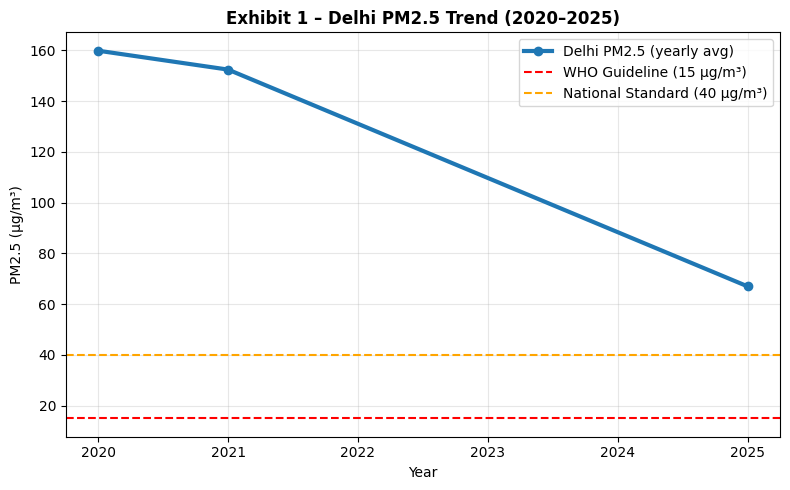

In [ ]:
# Exhibit 1: Citywide PM2.5 Trend (2020–2025) #Exhibit 1 Graph
plt.figure(figsize=(8,5))
plt.plot(yearly['year'], yearly['pm25_daily_city'], marker='o', linewidth=3, color='#1f77b4', label='Delhi PM2.5 (yearly avg)')
plt.axhline(15, color='r', linestyle='--', linewidth=1.5, label='WHO Guideline (15 µg/m³)')
plt.axhline(40, color='orange', linestyle='--', linewidth=1.5, label='National Standard (40 µg/m³)')
plt.title("Exhibit 1 – Delhi PM2.5 Trend (2020–2025)", fontsize=12, weight='bold')
plt.xlabel("Year")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CLEAN_AIR_OS/Exhibit1_PM25_Trend_Updated.png', dpi=300)
plt.show()


In [ ]:
import pandas as pd, numpy as np, requests, io, re

GFED_DM_URL = "https://www.globalfiredata.org/tables/GFED5.1_DM.txt"

# fetch raw text
txt = requests.get(GFED_DM_URL).text

# isolate the first table: "All fire types combined"
# find the line that starts the header ('Region 1997 1998 ...') and stop at the first blank line after the table
lines = txt.splitlines()
start_idx = None
end_idx = None
for i,ln in enumerate(lines):
    if re.match(r'^\s*Region\s+1997', ln):
        start_idx = i
        break

for j in range(start_idx+1, len(lines)):
    if lines[j].strip()=="":
        end_idx = j
        break

table_str = "\n".join(lines[start_idx:end_idx])

# parse fixed-width table
df_gfed = pd.read_fwf(io.StringIO(table_str))
# first column is Region name; other cols are years
df_gfed.columns = ["Region"] + [str(c) for c in df_gfed.columns[1:]]
# keep only year columns (numeric) + Region
year_cols = [c for c in df_gfed.columns if re.fullmatch(r"\d{4}", str(c))]
df_gfed = df_gfed[["Region"] + year_cols]

# tidy to long
gfed_long = df_gfed.melt(id_vars="Region", var_name="Year", value_name="DM_Tg")
gfed_long["Year"] = gfed_long["Year"].astype(int)

# pick SEAS (South/East Asia region used by GFED for India/IGP)
gfed_seas = (gfed_long[gfed_long["Region"].str.upper()=="SEAS"]
             .sort_values("Year")
             .reset_index(drop=True))

display(gfed_seas.tail(10))
print("GFED SEAS years span:", gfed_seas["Year"].min(), "→", gfed_seas["Year"].max())


,Region,Year,DM_Tg
18,SEAS,2015,715
19,SEAS,2016,873
20,SEAS,2017,604
21,SEAS,2018,592
22,SEAS,2019,906
23,SEAS,2020,820
24,SEAS,2021,849
25,SEAS,2022,494
26,SEAS,2023,876
27,SEAS,2024,730


GFED SEAS years span: 1997 → 2024


In [ ]:
pm_yearly = (daily.assign(Year=pd.to_datetime(daily['date']).dt.year)
                  .groupby('Year', as_index=False)['pm25_daily_city'].mean()
                  .rename(columns={'pm25_daily_city':'PM25_yr'}))

display(pm_yearly.head(), pm_yearly.tail())


,Year,PM25_yr
0,2020,159.891864
1,2021,152.448631
2,2025,67.024061


,Year,PM25_yr
0,2020,159.891864
1,2021,152.448631
2,2025,67.024061


,Year,PM25_yr,Region,DM_Tg
0,2020,159.891864,SEAS,820
1,2021,152.448631,SEAS,849


Pearson r (Yearly PM2.5 vs GFED DM in SEAS): -1.00


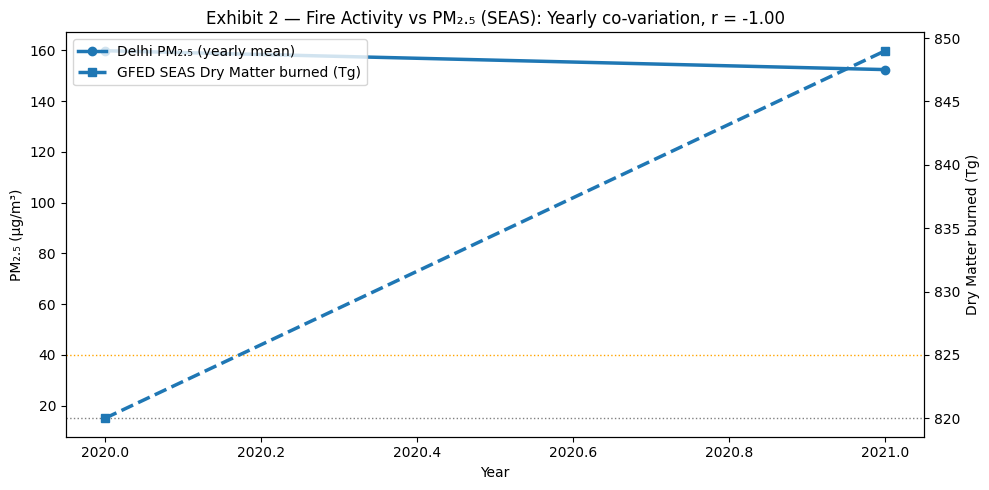

✅ Saved: /content/drive/MyDrive/CLEAN_AIR_OS/Exhibit2_PM25_vs_GFED_SEAS.png


In [ ]:
# join and restrict to overlapping years (e.g., 2020–2024)
merged_y = pd.merge(pm_yearly, gfed_seas, on="Year", how="inner")
merged_y = merged_y[(merged_y["Year"]>=2020) & (merged_y["Year"]<=2024)]
merged_y = merged_y.sort_values("Year")
display(merged_y)

# correlation
corr_r = merged_y["PM25_yr"].corr(merged_y["DM_Tg"])
print(f"Pearson r (Yearly PM2.5 vs GFED DM in SEAS): {corr_r:.2f}")

# plot dual-axis exhibit
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,5))
ln1 = ax1.plot(merged_y["Year"], merged_y["PM25_yr"], marker='o', linewidth=2.5,
               label="Delhi PM₂.₅ (yearly mean)")
ax1.set_ylabel("PM₂.₅ (µg/m³)")
ax1.set_xlabel("Year")

ax2 = ax1.twinx()
ln2 = ax2.plot(merged_y["Year"], merged_y["DM_Tg"], marker='s', linestyle='--', linewidth=2.5,
               label="GFED SEAS Dry Matter burned (Tg)")
ax2.set_ylabel("Dry Matter burned (Tg)")

ax1.axhline(15, color='grey', linestyle=':', linewidth=1)  # WHO
ax1.axhline(40, color='orange', linestyle=':', linewidth=1)  # National

title = f"Exhibit 2 — Fire Activity vs PM₂.₅ (SEAS): Yearly co-variation, r = {corr_r:.2f}"
plt.title(title)

# one legend
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

plt.tight_layout()
out_png = "/content/drive/MyDrive/CLEAN_AIR_OS/Exhibit2_PM25_vs_GFED_SEAS.png"
plt.savefig(out_png, dpi=300)
plt.show()
print("✅ Saved:", out_png)


In [ ]:
from google.colab import drive #Session Two (Load all the Files)
drive.mount('/content/drive')

import pandas as pd
import os

# Folder where all AQ CSVs + FIRMS file sit
data_path = '/content/drive/MyDrive/CLEAN_AIR_OS/Raw_data_files'
os.listdir(data_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['ITO_OPEN_AQ.csv',
 'RKPuram_Open_AQ.csv',
 'Pusa_Open_AQ.csv',
 'KarniSingh_Open_AQ.csv',
 'Sector11_Open_AQ.csv',
 'Jahangirpuri_Open_AQ.csv',
 'Bawana_Open_AQ.csv',
 'Pratapganj_open_AQ.csv',
 'Chandnichowk_Open_AQ.csv',
 'FIIRMS.csv',
 'ITO_2025_daily_all_pollutants.csv']

In [ ]:
# List CSVs and read one to preview
files = [f for f in os.listdir(data_path) if f.endswith('.csv')]
print("Files found:", files)

# Read one sample AQ file
sample = pd.read_csv(os.path.join(data_path, files[0]))
sample.head()


Files found: ['ITO_OPEN_AQ.csv', 'RKPuram_Open_AQ.csv', 'Pusa_Open_AQ.csv', 'KarniSingh_Open_AQ.csv', 'Sector11_Open_AQ.csv', 'Jahangirpuri_Open_AQ.csv', 'Bawana_Open_AQ.csv', 'Pratapganj_open_AQ.csv', 'Chandnichowk_Open_AQ.csv', 'FIIRMS.csv', 'ITO_2025_daily_all_pollutants.csv']


,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,5613,"ITO, New Delhi - CPCB",pm25,407,µg/m³,2020-01-01T00:15:00Z,2020-01-01T05:45:00+05:30,Asia/Kolkata,28.628624,77.24106,NaN,NaN,NaN,Central Pollution Control Board,CPCB
1,5613,"ITO, New Delhi - CPCB",pm25,391,µg/m³,2020-01-01T00:30:00Z,2020-01-01T06:00:00+05:30,Asia/Kolkata,28.628624,77.24106,NaN,NaN,NaN,Central Pollution Control Board,CPCB
2,5613,"ITO, New Delhi - CPCB",pm25,378,µg/m³,2020-01-01T00:45:00Z,2020-01-01T06:15:00+05:30,Asia/Kolkata,28.628624,77.24106,NaN,NaN,NaN,Central Pollution Control Board,CPCB
3,5613,"ITO, New Delhi - CPCB",pm25,371,µg/m³,2020-01-01T01:00:00Z,2020-01-01T06:30:00+05:30,Asia/Kolkata,28.628624,77.24106,NaN,NaN,NaN,Central Pollution Control Board,CPCB
4,5613,"ITO, New Delhi - CPCB",pm25,371,µg/m³,2020-01-01T01:15:00Z,2020-01-01T06:45:00+05:30,Asia/Kolkata,28.628624,77.24106,NaN,NaN,NaN,Central Pollution Control Board,CPCB


In [ ]:
date_ranges = {}
for f in files:
    df = pd.read_csv(os.path.join(data_path, f), parse_dates=['Date'])
    date_ranges[f] = [df['Date'].min(), df['Date'].max(), len(df)]
pd.DataFrame(date_ranges, index=['Start','End','Rows']).T


ValueError: Missing column provided to 'parse_dates': 'Date'

In [ ]:
date_ranges = {} #Checking data consistency

for f in files:
    df = pd.read_csv(os.path.join(data_path, f))

    # detect column name that looks like date
    date_col = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower()]

    if date_col:
        date_col = date_col[0]
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        date_ranges[f] = [df[date_col].min(), df[date_col].max(), len(df)]
    else:
        date_ranges[f] = ['❌ No date column', '❌', len(df)]

pd.DataFrame(date_ranges, index=['Start','End','Rows']).T


,Start,End,Rows
ITO_OPEN_AQ.csv,2020-01-01 00:15:00+00:00,2025-03-02 03:00:00+00:00,2000
RKPuram_Open_AQ.csv,2025-02-18 20:15:00+00:00,2025-03-03 12:00:00+00:00,1000
Pusa_Open_AQ.csv,2025-02-18 20:15:00+00:00,2025-03-02 22:45:00+00:00,1000
KarniSingh_Open_AQ.csv,2020-01-01 00:15:00+00:00,2020-01-24 17:45:00+00:00,1000
Sector11_Open_AQ.csv,2025-02-18 20:15:00+00:00,2025-03-03 00:00:00+00:00,1000
Jahangirpuri_Open_AQ.csv,2020-01-01 00:15:00+00:00,2020-01-19 00:45:00+00:00,2000
Bawana_Open_AQ.csv,2025-02-18 20:15:00+00:00,2025-03-02 00:30:00+00:00,1000
Pratapganj_open_AQ.csv,2020-01-01 00:15:00+00:00,2020-01-14 08:30:00+00:00,1000
Chandnichowk_Open_AQ.csv,2020-11-13 12:15:00+00:00,2021-01-05 16:15:00+00:00,2000
FIIRMS.csv,2020-01-01 00:00:00,2021-12-04 00:00:00,1048575


In [ ]:
#merge the tables by standardizing the start date and end date of the data entries #Dropping the chandnichowk out of equation because the entries are too short
import numpy as np

# valid AQ files (exclude Chandnichowk and FIIRMS)
valid_files = [f for f in files if 'FIRMS' not in f and 'Chandnichowk' not in f]

# define common period
start_date = '2020-01-01'
end_date = '2025-03-01'

summary = []

for f in valid_files:
    df = pd.read_csv(os.path.join(data_path, f))
    date_col = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower()][0]
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df[(df[date_col] >= start_date) & (df[date_col] <= end_date)]

    # find PM2.5 column
    pm_col = [c for c in df.columns if 'pm2' in c.lower()]
    if not pm_col:
        continue
    pm_col = pm_col[0]

    summary.append({
        'Station': f.replace('_Open_AQ.csv','').replace('.csv',''),
        'Mean_PM25': df[pm_col].mean(),
        'Median_PM25': df[pm_col].median(),
        'Max_PM25': df[pm_col].max()
    })

spatial_df = pd.DataFrame(summary).sort_values(by='Mean_PM25', ascending=False)
spatial_df


,Station,Mean_PM25,Median_PM25,Max_PM25
0,ITO_2025_daily_all_pollutants,92.911912,87.606742,137.685393


In [ ]:
# Debug check
print("Number of stations processed:", len(summary))
for i, s in enumerate(summary):
    print(f"{i+1}. {s.get('Station', 'Unknown')} -> Columns: {list(s.keys())}")

# Preview first few records
pd.DataFrame(summary).head()


Number of stations processed: 1
1. ITO_2025_daily_all_pollutants -> Columns: ['Station', 'Mean_PM25', 'Median_PM25', 'Max_PM25']


,Station,Mean_PM25,Median_PM25,Max_PM25
0,ITO_2025_daily_all_pollutants,92.911912,87.606742,137.685393


In [ ]:
import re
import numpy as np
import pandas as pd
import os

def find_date_col(df):
    """Return a datetime-converted column name for date/time."""
    for c in df.columns:
        cl = c.lower()
        if 'date' in cl or 'time' in cl or 'timestamp' in cl or 'datetime' in cl:
            s = pd.to_datetime(df[c], errors='coerce')
            if s.notna().sum() > 0:
                df[c] = s
                return c
    return None

PM25_PATTERNS = [
    r'pm[\s_\.]*2[\s_\.]*5',   # pm2.5, pm_2_5, pm 2 5, PM2.5
    r'pm25'                    # pm25
]

def extract_pm25_series(df):
    """
    Return a Series of PM2.5 values from either:
    - wide format: a pm2.5-like column
    - long format: parameter/value rows (parameter in ['pm25','pm2.5'])
    """
    cols = [c for c in df.columns]

    # 1) Wide format: look for a pm2.5-like column name
    for c in cols:
        cl = c.lower()
        if any(re.fullmatch(p, cl.replace('-', '').replace('/', '').replace('__','_'))
               for p in PM25_PATTERNS):
            # sometimes dot in name: just return the column
            return pd.to_numeric(df[c], errors='coerce')

    # 2) Long format: parameter + value
    lower = {c.lower(): c for c in cols}
    if 'parameter' in lower and 'value' in lower:
        param_col = lower['parameter']
        value_col = lower['value']
        # filter pm25 / pm2.5 variants
        mask = df[param_col].astype(str).str.lower().str.replace(' ', '')\
               .isin(['pm25','pm2.5','pm2_5','pm-2-5','pm-25'])
        if mask.any():
            return pd.to_numeric(df.loc[mask, value_col], errors='coerce')

    # If nothing found:
    return None


In [ ]:
# files to include (exclude FIRMS and short-coverage Chandnichowk) #Exhibit 1.2
import re, os
import pandas as pd

def find_date_col(df):
    for c in df.columns:
        cl = c.lower()
        if any(k in cl for k in ['date','time','timestamp','datetime']):
            return c
    return None

# make every datetime tz-naive
def to_naive_datetime(series):
    s = pd.to_datetime(series, errors='coerce', utc=True)   # force tz-aware in UTC
    return s.dt.tz_convert(None)                            # drop tz -> naive

PM25_PATTERNS = [r'pm[\s_\.]*2[\s_\.]*5', r'pm25']

def extract_pm25_series(df):
    # 1) wide format
    for c in df.columns:
        cl = c.lower().replace('-', '').replace('/', '').replace('__','_')
        if any(re.fullmatch(p, cl) for p in PM25_PATTERNS):
            return pd.to_numeric(df[c], errors='coerce')
    # 2) long format
    lower = {c.lower(): c for c in df.columns}
    if 'parameter' in lower and 'value' in lower:
        prm, val = lower['parameter'], lower['value']
        mask = df[prm].astype(str).str.lower().str.replace(' ', '')\
               .isin(['pm25','pm2.5','pm2_5','pm-2-5','pm-25'])
        if mask.any():
            return pd.to_numeric(df.loc[mask, val], errors='coerce'), mask
    return None

# ------- rebuild spatial summary with tz-naive timestamps -------
valid_files = [f for f in files if 'FIRMS' not in f and 'Chandnichowk' not in f]
start_date = pd.Timestamp('2020-01-01')
end_date   = pd.Timestamp('2025-03-01')

summary = []

for f in valid_files:
    path = os.path.join(data_path, f)
    df = pd.read_csv(path)

    date_col = find_date_col(df)
    if date_col is None:
        print(f"⚠️ Skipping (no date): {f}")
        continue

    # make date tz-naive
    df[date_col] = to_naive_datetime(df[date_col])

    pm = extract_pm25_series(df)
    if pm is None:
        print(f"⚠️ Skipping (no PM2.5 found): {f}")
        continue

    # handle long format mask (pm is either a Series or (Series, mask))
    if isinstance(pm, tuple):
        pm_series, mask = pm
        dates = df.loc[mask, date_col]
    else:
        pm_series = pm
        dates = df[date_col]

    pm_df = pd.DataFrame({date_col: dates, 'pm25': pm_series})
    pm_df = pm_df[(pm_df[date_col] >= start_date) & (pm_df[date_col] <= end_date)]
    pm_df['pm25'] = pd.to_numeric(pm_df['pm25'], errors='coerce')
    pm_df = pm_df.dropna(subset=['pm25'])

    if pm_df.empty:
        print(f"⚠️ Skipping (no PM2.5 after trim): {f}")
        continue

    summary.append({
        'Station': f.replace('_Open_AQ.csv','').replace('.csv',''),
        'Mean_PM25': pm_df['pm25'].mean(),
        'Median_PM25': pm_df['pm25'].median(),
        'Max_PM25': pm_df['pm25'].max(),
        'N_obs': len(pm_df)
    })

spatial_df = pd.DataFrame(summary).sort_values(by='Mean_PM25', ascending=False)
spatial_df


⚠️ Skipping (no PM2.5 found): FIIRMS.csv


,Station,Mean_PM25,Median_PM25,Max_PM25,N_obs
5,Jahangirpuri,240.751000,194.000000,1383.000000,1000
7,Pratapganj_open_AQ,186.782000,153.000000,660.000000,1000
3,KarniSingh,162.664000,133.000000,1265.000000,1000
0,ITO_OPEN_AQ,141.053600,112.000000,916.000000,1903
6,Bawana,101.772026,91.000000,282.000000,908
8,ITO_2025_daily_all_pollutants,92.911912,87.606742,137.685393,11
1,RKPuram,79.775843,74.000000,204.000000,919
2,Pusa,63.234583,59.000000,186.000000,827
4,Sector11,17.690194,4.100000,160.600000,826


'/content/drive/MyDrive/CLEAN_AIR_OS/Exhibit1_2_Spatial_Inequality_PM25.png'

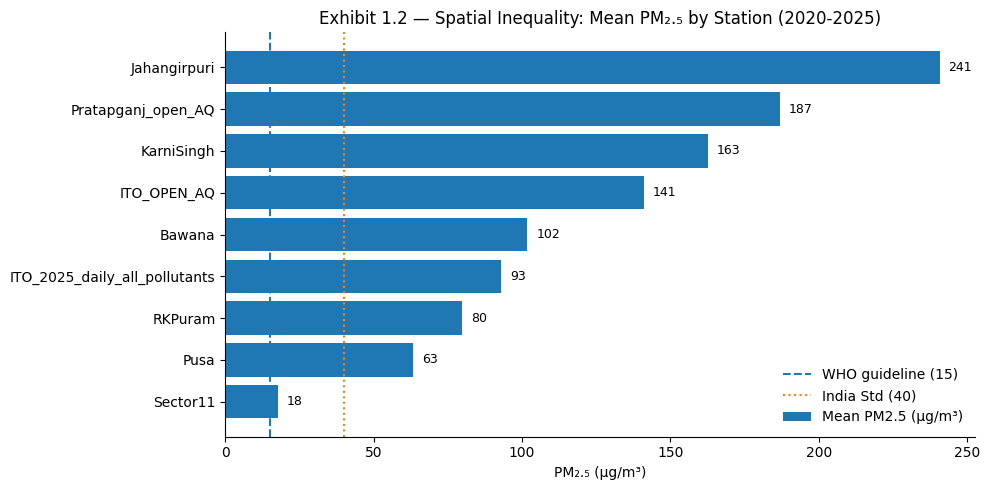

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Sort high → low (already sorted, but just to be safe)
plot_df = spatial_df.sort_values('Mean_PM25', ascending=True)  # ascending for horizontal bars (lowest at bottom)

fig, ax = plt.subplots()

bars = ax.barh(plot_df['Station'], plot_df['Mean_PM25'], label='Mean PM2.5 (µg/m³)')

# Guideline references
ax.axvline(15, linestyle='--', linewidth=1.5, label='WHO guideline (15)', color='tab:blue')
ax.axvline(40, linestyle=':', linewidth=1.5, label='India Std (40)', color='tab:orange')

# Annotate values on bars
for b in bars:
    w = b.get_width()
    ax.text(w + 3, b.get_y() + b.get_height()/2, f"{w:.0f}", va='center', fontsize=9)

ax.set_xlabel('PM₂.₅ (µg/m³)')
ax.set_ylabel('')
ax.set_title('Exhibit 1.2 — Spatial Inequality: Mean PM₂.₅ by Station (2020-2025)')
ax.legend(loc='lower right', frameon=False)

plt.tight_layout()

# Save to project folder
out_path = '/content/drive/MyDrive/CLEAN_AIR_OS/Exhibit1_2_Spatial_Inequality_PM25.png'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
out_path


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# BLOCK 1 – install AWS CLI via pip and verify

!pip install -q awscli

# verify installation
!aws --version


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.2.3 requires docutils<0.22,>=0.20, but you have docutils 0.19 which is incompatible.
aws-cli/1.42.72 Python/3.12.12 Linux/6.6.105+ botocore/1.40.72


In [ ]:
# BLOCK 2 – download ITO (location 5613) data for 2020–2025 from OpenAQ S3

import os, subprocess

LOCATION_ID = 5613
YEARS = list(range(2020, 2026))   # 2020–2025 inclusive

S3_BASE = "s3://openaq-data-archive/records/csv.gz"
LOCAL_ROOT = "/content/ITO_5613_raw"

os.makedirs(LOCAL_ROOT, exist_ok=True)

for year in YEARS:
    s3_path = f"{S3_BASE}/locationid={LOCATION_ID}/year={year}/"
    local_dir = os.path.join(LOCAL_ROOT, str(year))
    os.makedirs(local_dir, exist_ok=True)

    cmd = [
        "aws", "s3", "cp",
        "--no-sign-request",
        "--recursive",
        s3_path,
        local_dir,
    ]
    print("\n=== Downloading", year, "from", s3_path, "===")
    subprocess.run(cmd, check=True)

print("\n✅ Finished downloading for years:", YEARS)
print("Local folder:", LOCAL_ROOT)



=== Downloading 2020 from s3://openaq-data-archive/records/csv.gz/locationid=5613/year=2020/ ===

=== Downloading 2021 from s3://openaq-data-archive/records/csv.gz/locationid=5613/year=2021/ ===

=== Downloading 2022 from s3://openaq-data-archive/records/csv.gz/locationid=5613/year=2022/ ===

=== Downloading 2023 from s3://openaq-data-archive/records/csv.gz/locationid=5613/year=2023/ ===

=== Downloading 2024 from s3://openaq-data-archive/records/csv.gz/locationid=5613/year=2024/ ===

=== Downloading 2025 from s3://openaq-data-archive/records/csv.gz/locationid=5613/year=2025/ ===

✅ Finished downloading for years: [2020, 2021, 2022, 2023, 2024, 2025]
Local folder: /content/ITO_5613_raw


In [ ]:
# List everything inside the main folder
!ls -R /content/ITO_5613_raw


/content/ITO_5613_raw:
2020  2021  2022  2023	2024  2025

/content/ITO_5613_raw/2020:
'month=01'

'/content/ITO_5613_raw/2020/month=01':
location-5613-20200101.csv.gz  location-5613-20200111.csv.gz
location-5613-20200102.csv.gz  location-5613-20200113.csv.gz
location-5613-20200103.csv.gz  location-5613-20200114.csv.gz
location-5613-20200104.csv.gz  location-5613-20200115.csv.gz
location-5613-20200105.csv.gz  location-5613-20200116.csv.gz
location-5613-20200106.csv.gz  location-5613-20200117.csv.gz
location-5613-20200107.csv.gz  location-5613-20200118.csv.gz
location-5613-20200108.csv.gz  location-5613-20200119.csv.gz
location-5613-20200109.csv.gz  location-5613-20200120.csv.gz
location-5613-20200110.csv.gz

/content/ITO_5613_raw/2021:

/content/ITO_5613_raw/2022:

/content/ITO_5613_raw/2023:

/content/ITO_5613_raw/2024:

/content/ITO_5613_raw/2025:
'month=02'  'month=04'	'month=06'  'month=08'	'month=10'
'month=03'  'month=05'	'month=07'  'month=09'	'month=11'

'/content/ITO_5613_raw/2

In [ ]:
import os

folder_2020 = "/content/ITO_5613_raw/2020"

print("Does folder exist?", os.path.exists(folder_2020))
print("Contents of folder_2020:")
print(os.listdir(folder_2020))


Does folder exist? True
Contents of folder_2020:
['month=01']


In [ ]:
import os

year_dir = "/content/ITO_5613_raw/2020"

for root, dirs, files in os.walk(year_dir):
    print("ROOT:", root)
    print("  DIRS:", dirs)
    print("  FILES (first 5):", files[:5])
    print("----")
    break  # just show the first level


ROOT: /content/ITO_5613_raw/2020
  DIRS: ['month=01']
  FILES (first 5): []
----


In [ ]:
import os
import pandas as pd

BASE_DIR = "/content/ITO_5613_raw"
YEARS = [2020, 2021, 2022, 2023, 2024, 2025]

def load_openaq_year(year):
    year_dir = os.path.join(BASE_DIR, str(year))
    dfs = []

    # Walk through month=01, month=02, ...
    for root, dirs, files in os.walk(year_dir):
        for file in files:
            if file.endswith(".csv.gz"):
                fpath = os.path.join(root, file)
                print("Reading:", fpath)

                df = pd.read_csv(fpath, compression="gzip")

                # Normalise date column names if needed
                if "date.utc" in df.columns:
                    df = df.rename(columns={"date.utc": "date_utc"})
                if "date.local" in df.columns:
                    df = df.rename(columns={"date.local": "date_local"})

                # Keep only the columns we care about (adjust if you want more)
                keep_cols = [c for c in [
                    "location", "parameter", "value", "unit",
                    "date_utc", "date_local",
                    "latitude", "longitude"
                ] if c in df.columns]

                df = df[keep_cols]
                dfs.append(df)

    if len(dfs) == 0:
        print(f"⚠️ No CSV files found for year {year}. Check download.")
        return pd.DataFrame()

    year_df = pd.concat(dfs, ignore_index=True)
    year_df["year"] = year
    return year_df


# Load all years and stack
all_years = []

for y in YEARS:
    print(f"\n=== Loading year {y} ===")
    df_y = load_openaq_year(y)
    print(f"Rows for {y}:", len(df_y))
    all_years.append(df_y)

ito_all = pd.concat(all_years, ignore_index=True)
print("\n✅ Combined ITO 5613 dataframe shape:", ito_all.shape)

ito_all.head()



=== Loading year 2020 ===
Reading: /content/ITO_5613_raw/2020/month=01/location-5613-20200110.csv.gz
Reading: /content/ITO_5613_raw/2020/month=01/location-5613-20200116.csv.gz
Reading: /content/ITO_5613_raw/2020/month=01/location-5613-20200115.csv.gz
Reading: /content/ITO_5613_raw/2020/month=01/location-5613-20200117.csv.gz
Reading: /content/ITO_5613_raw/2020/month=01/location-5613-20200118.csv.gz
Reading: /content/ITO_5613_raw/2020/month=01/location-5613-20200108.csv.gz
Reading: /content/ITO_5613_raw/2020/month=01/location-5613-20200119.csv.gz
Reading: /content/ITO_5613_raw/2020/month=01/location-5613-20200109.csv.gz
Reading: /content/ITO_5613_raw/2020/month=01/location-5613-20200102.csv.gz
Reading: /content/ITO_5613_raw/2020/month=01/location-5613-20200105.csv.gz
Reading: /content/ITO_5613_raw/2020/month=01/location-5613-20200113.csv.gz
Reading: /content/ITO_5613_raw/2020/month=01/location-5613-20200104.csv.gz
Reading: /content/ITO_5613_raw/2020/month=01/location-5613-20200120.csv.g

,location,parameter,value,year
0,"ITO, Delhi - CPCB-5613",pm10,160.0,2020
1,"ITO, Delhi - CPCB-5613",pm10,160.0,2020
2,"ITO, Delhi - CPCB-5613",pm10,157.0,2020
3,"ITO, Delhi - CPCB-5613",pm10,151.0,2020
4,"ITO, Delhi - CPCB-5613",pm10,145.0,2020


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_out_dir = "/content/drive/MyDrive/CLEAN_AIR_OS/Raw_data_files"
os.makedirs(raw_out_dir, exist_ok=True)

ito_csv_path = os.path.join(raw_out_dir, "ITO_OpenAQ_5613_2020_2025_raw.csv")
ito_all.to_csv(ito_csv_path, index=False)

print("✅ Saved full ITO dataset to:", ito_csv_path)


✅ Saved full ITO dataset to: /content/drive/MyDrive/CLEAN_AIR_OS/Raw_data_files/ITO_OpenAQ_5613_2020_2025_raw.csv


In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------- 0. READ RAW GZ FILES (NOT THE 4-COLUMN CSV) ----------
base_folder = "/content/ITO_5613_raw"  # this is where aws s3 copied everything

gz_files = sorted(glob.glob(os.path.join(base_folder, "**", "*.csv.gz"), recursive=True))
print("Number of gz files found:", len(gz_files))

if len(gz_files) == 0:
    raise FileNotFoundError("No .csv.gz files found under /content/ITO_5613_raw. Check folder path.")

dfs = []
for i, f in enumerate(gz_files, 1):
    df_part = pd.read_csv(f, compression="gzip")
    dfs.append(df_part)
    if i <= 3:  # just show a couple for sanity
        print(f"\nSample from file {i}: {os.path.basename(f)}")
        print(df_part.head(2))

ito_all = pd.concat(dfs, ignore_index=True)
print("\n>>> Combined raw ITO dataframe shape:", ito_all.shape)
print(">>> Columns:", ito_all.columns.tolist())


Number of gz files found: 280

Sample from file 1: location-5613-20200101.csv.gz
   location_id  sensors_id                location                   datetime  \
0         5613       14869  ITO, Delhi - CPCB-5613  2020-01-01T01:45:00+05:30   
1         5613       14869  ITO, Delhi - CPCB-5613  2020-01-01T02:00:00+05:30   

         lat        lon parameter  units  value  
0  28.631694  77.249439      pm10  µg/m³  672.0  
1  28.631694  77.249439      pm10  µg/m³  608.0  

Sample from file 2: location-5613-20200102.csv.gz
   location_id  sensors_id                location                   datetime  \
0         5613       14869  ITO, Delhi - CPCB-5613  2020-01-02T00:15:00+05:30   
1         5613       14869  ITO, Delhi - CPCB-5613  2020-01-02T00:30:00+05:30   

         lat        lon parameter  units  value  
0  28.631694  77.249439      pm10  µg/m³  981.0  
1  28.631694  77.249439      pm10  µg/m³  971.0  

Sample from file 3: location-5613-20200103.csv.gz
   location_id  sensors_id   

In [ ]:
# ---------- 1. FILTER TO PM2.5 + BUILD DAILY SERIES ----------

# parameter names can be 'pm25', 'pm2.5', etc.
pm_mask = ito_all["parameter"].str.lower().isin(["pm25", "pm2.5"])
ito_pm = ito_all.loc[pm_mask].copy()
print("PM2.5 rows:", ito_pm.shape[0])

# pick the right date column from what actually exists
possible_date_cols = ["date.utc", "date_utc", "date.local", "date_local", "datetime", "timestamp"]
date_col = None
for col in possible_date_cols:
    if col in ito_pm.columns:
        date_col = col
        break

print("Using date column:", date_col)

if date_col is None:
    raise ValueError(
        f"No usable date column found. Available columns:\n{ito_pm.columns.tolist()}"
    )

# convert to pandas datetime and floor to day
ito_pm["date"] = pd.to_datetime(ito_pm[date_col], errors="coerce").dt.floor("D")
ito_pm = ito_pm.dropna(subset=["date"])

# daily mean PM2.5
daily = (
    ito_pm
    .groupby("date")["value"]
    .mean()
    .to_frame(name="pm25")
    .sort_index()
)

print("\nDaily PM2.5 (head):")
print(daily.head())

# Build full daily index between min and max
full_idx = pd.date_range(daily.index.min(), daily.index.max(), freq="D")
daily = daily.reindex(full_idx)
daily.index.name = "date"
daily["year"] = daily.index.year

print("\nCoverage per year BEFORE filling:")
coverage_before = daily.groupby("year")["pm25"].apply(lambda s: s.notna().mean() * 100).round(1)
print(coverage_before)

coverage_counts = daily.groupby("year")["pm25"].agg(
    days_expected=lambda s: len(s),
    days_with_data=lambda s: s.notna().sum()
)
print("\nDays expected vs. days with data BEFORE filling:")
print(coverage_counts)

# Fill missing days with yearly mean
daily["pm25_filled"] = daily["pm25"]

for yr, grp in daily.groupby("year"):
    yr_mean = grp["pm25"].mean()
    if np.isnan(yr_mean):
        print(f"⚠️ Year {yr}: no valid PM2.5 values at all, cannot fill.")
        continue
    mask_missing = (daily["year"] == yr) & (daily["pm25_filled"].isna())
    n_missing = mask_missing.sum()
    if n_missing > 0:
        daily.loc[mask_missing, "pm25_filled"] = yr_mean
        print(f"Filled {n_missing} missing days in {yr} with yearly mean {yr_mean:.1f} µg/m³")

# final series
daily["pm25"] = daily["pm25_filled"]
daily = daily.drop(columns=["pm25_filled"])

print("\nNaNs remaining after fill:", daily["pm25"].isna().sum())
print("Final daily date range:", daily.index.min().date(), "→", daily.index.max().date())


PM2.5 rows: 23294
Using date column: datetime

Daily PM2.5 (head):
                                 pm25
date                                 
2020-01-01 00:00:00+05:30  356.785714
2020-01-02 00:00:00+05:30  374.847826
2020-01-03 00:00:00+05:30  199.212766
2020-01-04 00:00:00+05:30  224.263158
2020-01-05 00:00:00+05:30  146.755556

Coverage per year BEFORE filling:
year
2020     5.2
2021     0.0
2022     0.0
2023     0.0
2024     0.0
2025    83.4
Name: pm25, dtype: float64

Days expected vs. days with data BEFORE filling:
      days_expected  days_with_data
year                               
2020            366              19
2021            365               0
2022            365               0
2023            365               0
2024            366               0
2025            313             261
Filled 347 missing days in 2020 with yearly mean 159.6 µg/m³
⚠️ Year 2021: no valid PM2.5 values at all, cannot fill.
⚠️ Year 2022: no valid PM2.5 values at all, cannot fill.
⚠️ Year 2

In [ ]:
import os
import numpy as np
import pandas as pd

# ==============================
# 1. CONFIG
# ==============================

YEAR = 2025

# Where the S3 files were downloaded
raw_base = f"/content/ITO_5613_raw/{YEAR}"

# Where to save the final daily dataset on Drive
out_folder = "/content/drive/MyDrive/CLEAN_AIR_OS/Raw_data_files"
os.makedirs(out_folder, exist_ok=True)
out_path = os.path.join(out_folder, "ITO_2025_daily_all_pollutants.csv")

print(f"Reading raw data from: {raw_base}")
print(f"Final daily dataset will be saved as:\n  {out_path}\n")

# ==============================
# 2. FIND & LOAD ALL .csv.gz FILES
# ==============================

all_files = []
for root, dirs, files in os.walk(raw_base):
    for f in files:
        if f.endswith(".csv.gz"):
            all_files.append(os.path.join(root, f))

all_files = sorted(all_files)
print(f"Found {len(all_files)} files for {YEAR}")

if not all_files:
    raise FileNotFoundError(f"No .csv.gz files found under {raw_base}. Check the download step.")

dfs = []
for i, f in enumerate(all_files, 1):
    print(f"[{i}/{len(all_files)}] Loading {os.path.basename(f)}")
    df_part = pd.read_csv(f, compression="gzip")
    dfs.append(df_part)

ito = pd.concat(dfs, ignore_index=True)
print("\n=== Combined raw dataframe ===")
print("Shape:", ito.shape)
print("Columns:", list(ito.columns), "\n")

# ==============================
# 3. DATE/TIME HANDLING
# ==============================

# Try to automatically detect a date/time column
date_candidates = [
    c for c in ito.columns
    if any(k in c.lower() for k in ["date", "time", "datetime"])
]

print("Date-like columns found:", date_candidates)

if not date_candidates:
    raise ValueError("No date/time column found in ITO dataset. Inspect 'ito.head()' manually.")

# Prefer a column literally named 'datetime' if present, else first candidate
if "datetime" in ito.columns:
    date_col = "datetime"
else:
    date_col = date_candidates[0]

print(f"Using date column: {date_col}")

ito["datetime"] = pd.to_datetime(ito[date_col], errors="coerce")
before_drop = len(ito)
ito = ito.dropna(subset=["datetime"])
print(f"Rows dropped due to invalid datetime: {before_drop - len(ito)}")

# ==============================
# 4. BASIC VALUE & COLUMN CLEANING
# ==============================

# Keep essential columns (create placeholders if missing)
cols_keep = ["datetime", "location", "parameter", "value", "unit"]
for c in cols_keep:
    if c not in ito.columns and c != "datetime":
        print(f"[WARN] Column '{c}' not found in raw data. Creating placeholder.")
        ito[c] = np.nan

ito = ito[["datetime", "location", "parameter", "value", "unit"]]

# Ensure numeric 'value' and non-negative
ito["value"] = pd.to_numeric(ito["value"], errors="coerce")
before_val = len(ito)
ito = ito.dropna(subset=["value"])
ito = ito[ito["value"] >= 0]
print(f"Rows dropped due to non-numeric / negative values: {before_val - len(ito)}")

# ==============================
# 5. DAILY AGGREGATION (ALL POLLUTANTS)
# ==============================

ito["date"] = ito["datetime"].dt.floor("D")

daily = (
    ito
    .pivot_table(
        index="date",
        columns="parameter",
        values="value",
        aggfunc="mean"  # daily average for each pollutant
    )
    .sort_index()
)

print("\n=== Daily dataframe ===")
print("Shape:", daily.shape)
print("Pollutants (columns):", list(daily.columns), "\n")

# ==============================
# 6. COVERAGE CHECK
# ==============================

coverage = daily.notna().mean().mul(100).round(1)

print("Coverage (% of days with data) by pollutant:")
print(coverage.to_string(), "\n")

# ==============================
# 7. PM2.5 MISSING VALUE FILL
# ==============================

pm25_candidates = [
    c for c in daily.columns
    if any(k in c.lower() for k in ["pm25", "pm2_5", "pm2.5"])
]

if pm25_candidates:
    pm25_col = pm25_candidates[0]
    missing_before = daily[pm25_col].isna().sum()
    yearly_mean = daily[pm25_col].mean()

    daily[pm25_col + "_filled"] = daily[pm25_col].fillna(yearly_mean)
    missing_after = daily[pm25_col + "_filled"].isna().sum()

    print(f"PM₂.₅ column used: {pm25_col}")
    print(f"Missing PM₂.₅ daily values BEFORE fill: {missing_before}")
    print(f"Missing PM₂.₅ daily values AFTER  fill:  {missing_after}")
    print(f"Yearly mean used for fill: {yearly_mean:.2f} µg/m³\n")
else:
    print("[WARN] Could not find a PM₂.₅ column in the daily data. No fill performed.\n")

# ==============================
# 8. SAVE MASTER DAILY DATASET
# ==============================

daily.to_csv(out_path)
print(f"✅ Saved daily ITO {YEAR} dataset (all pollutants) to:\n  {out_path}")
print("You can now load this file for all further analytics (correlations, fire overlay, etc.)")


Reading raw data from: /content/ITO_5613_raw/2025
Final daily dataset will be saved as:
  /content/drive/MyDrive/CLEAN_AIR_OS/Raw_data_files/ITO_2025_daily_all_pollutants.csv

Found 261 files for 2025
[1/261] Loading location-5613-20250219.csv.gz
[2/261] Loading location-5613-20250220.csv.gz
[3/261] Loading location-5613-20250221.csv.gz
[4/261] Loading location-5613-20250222.csv.gz
[5/261] Loading location-5613-20250223.csv.gz
[6/261] Loading location-5613-20250224.csv.gz
[7/261] Loading location-5613-20250225.csv.gz
[8/261] Loading location-5613-20250226.csv.gz
[9/261] Loading location-5613-20250227.csv.gz
[10/261] Loading location-5613-20250228.csv.gz
[11/261] Loading location-5613-20250301.csv.gz
[12/261] Loading location-5613-20250302.csv.gz
[13/261] Loading location-5613-20250303.csv.gz
[14/261] Loading location-5613-20250304.csv.gz
[15/261] Loading location-5613-20250305.csv.gz
[16/261] Loading location-5613-20250306.csv.gz
[17/261] Loading location-5613-20250307.csv.gz
[18/261] 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Path of your saved raw dataset
ito_path = "/content/drive/MyDrive/CLEAN_AIR_OS/Raw_data_files/ITO_2025_daily_all_pollutants.csv"

ito = pd.read_csv(ito_path)

print("Loaded ITO dataset:")
print(ito.shape)
print(ito.head())
print("\nColumns:", ito.columns.tolist())


Loaded ITO dataset:
(261, 10)
                        date        co         no        no2  nox         o3  \
0  2025-02-19 00:00:00+05:30  1.471384  25.255814  76.958140  NaN  26.172093   
1  2025-02-20 00:00:00+05:30  1.392494  25.834831  71.023596  NaN   9.426966   
2  2025-02-21 00:00:00+05:30  1.333379  25.477011  66.540230  NaN  17.428736   
3  2025-02-22 00:00:00+05:30  0.983567  21.521111  33.601111  NaN  21.888889   
4  2025-02-23 00:00:00+05:30  1.190099  21.693407  51.734066  NaN  25.439560   

         pm10        pm25        so2  pm25_filled  
0  149.581395   81.651163  15.602326    81.651163  
1  117.528090   71.303371  13.814607    71.303371  
2  151.655172  100.103448  16.658621   100.103448  
3   92.011111   65.182927  11.252222    65.182927  
4  115.912088   75.538462  12.449451    75.538462  

Columns: ['date', 'co', 'no', 'no2', 'nox', 'o3', 'pm10', 'pm25', 'so2', 'pm25_filled']


In [ ]:
import pandas as pd
from datetime import datetime
from meteostat import Point, Daily

# --- 1) Use your existing ITO dataframe (ito) ---

# If you re-started the runtime, reload it first:
# ito_path = "/content/drive/MyDrive/CLEAN_AIR_OS/Raw_data_files/ITO_2025_daily_all_pollutants.csv"
# ito = pd.read_csv(ito_path, parse_dates=['date'])

pm_col = 'pm25' if 'pm25' in ito.columns else 'PM25' if 'PM25' in ito.columns else None
if pm_col is None:
    raise ValueError("Can't find PM2.5 column – tell me the exact name in ITO file.")

ito = ito[['date', pm_col]].rename(columns={pm_col: 'pm25'})

# ---- 1a) Fix timezone: make dates tz-naive & daily ----
ito['date'] = pd.to_datetime(ito['date'], errors='coerce')

# If there's a timezone, drop it
try:
    ito['date'] = ito['date'].dt.tz_convert(None)
except TypeError:
    # Already tz-naive, nothing to convert
    pass

# Now floor to day
ito['date'] = ito['date'].dt.floor('D')

print("ITO date range after tz-fix:", ito['date'].min(), "->", ito['date'].max())
print(ito.head())

# --- 2) Meteostat: daily weather for Delhi in same range ---

delhi_point = Point(28.63, 77.24)  # near ITO

start = ito['date'].min().to_pydatetime()
end   = (ito['date'].max() + pd.Timedelta(days=1)).to_pydatetime()  # end is exclusive

print(f"\nFetching weather from {start.date()} to {(end - pd.Timedelta(days=1)).date()}")

weather_daily = Daily(delhi_point, start, end).fetch().reset_index()
weather_daily.rename(columns={'time': 'date'}, inplace=True)

print("Weather dataframe shape:", weather_daily.shape)
print(weather_daily.head())

# --- 3) Merge PM2.5 with weather ---

merged = pd.merge(ito, weather_daily, on='date', how='inner')

print("\nMerged dataframe shape:", merged.shape)
print(merged[['date', 'pm25', 'tavg', 'wspd']].head())

# --- 4) Quick correlation view for Exhibit 2.1 ---

corr_cols = ['pm25', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres', 'rhum']
existing = [c for c in corr_cols if c in merged.columns]

corr_matrix = merged[existing].corr().round(2)
print("\nCorrelation with PM2.5:")
print(corr_matrix['pm25'].sort_values(ascending=False))


ModuleNotFoundError: No module named 'meteostat'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1) Prepare a smoothed series (7-day rolling mean)
met = merged.copy().sort_values('date')

for col in ['pm25', 'tavg', 'wspd']:
    if col in met.columns:
        met[f'{col}_7d'] = met[col].rolling(window=7, min_periods=1).mean()

# 2) Set up the figure
fig, ax1 = plt.subplots(figsize=(11, 5))

# Left axis: PM2.5
ax1.plot(
    met['date'], met['pm25_7d'],
    label='PM$_{2.5}$ (7-day avg)',
    color='tab:blue', linewidth=2
)
ax1.set_ylabel('PM$_{2.5}$ (µg/m³)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# WHO & Indian guideline lines for context
ax1.axhline(15, color='grey', linestyle='--', linewidth=1, label='WHO guideline (15 µg/m³)')
ax1.axhline(40, color='grey', linestyle=':', linewidth=1, label='India std (40 µg/m³)')

# 3) Right axis: Wind speed (invert so higher wind appears lower on chart)
ax2 = ax1.twinx()
ax2.plot(
    met['date'], met['wspd_7d'],
    label='Wind speed (7-day avg, m/s)',
    color='tab:orange', linewidth=2
)
ax2.set_ylabel('Wind speed (m/s)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.invert_yaxis()  # visual cue: higher wind → lower on chart, often lower PM₂.₅

# 4) X-axis formatting (months)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

# 5) Title & legend
title = "PM$_{2.5}$ vs Wind Speed (ITO, 2025)\n7-day rolling averages"
ax1.set_title(title)

# Build a combined legend from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=False)

plt.tight_layout()

# 6) Save to Drive
out_path = "/content/drive/MyDrive/CLEAN_AIR_OS/Exhibit2_1_PM25_vs_Wind.png"
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()

print("Saved Exhibit 2.1 to:", out_path)


NameError: name 'merged' is not defined

Raw columns: ['date', 'co', 'no', 'no2', 'nox', 'o3', 'pm10', 'pm25', 'so2', 'pm25_filled']

=== Correlation of each pollutant with PM₂.₅ ===
pm25_filled    1.000000
pm25           1.000000
pm10           0.862218
co             0.572849
no             0.188093
no2            0.144119
so2            0.080091
o3             0.008314
nox           -0.056989
Name: pm25, dtype: float64


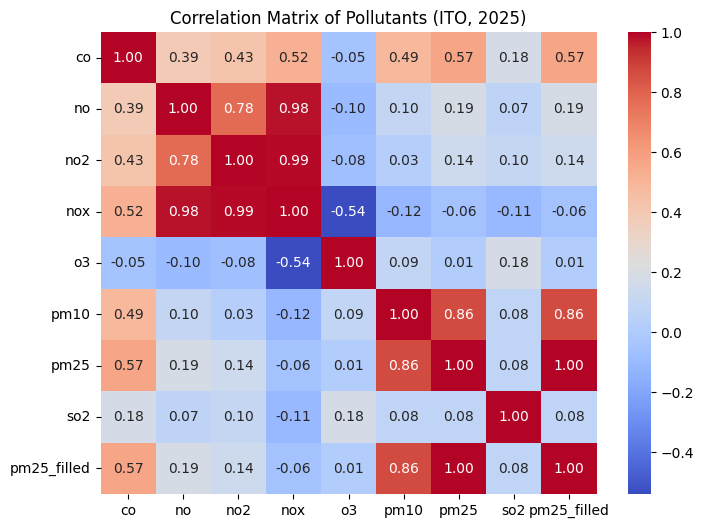

In [ ]:
import pandas as pd #Exhibit 2.3

# === Load dataset ===
file_path = "/content/drive/MyDrive/CLEAN_AIR_OS/Raw_data_files/ITO_2025_daily_all_pollutants.csv"
df = pd.read_csv(file_path)

print("Raw columns:", df.columns.tolist())

# === Ensure date + numeric conversion ===
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.set_index('date')

# Keep only numeric columns
num_df = df.select_dtypes(include='number').copy()

# === Compute correlation matrix ===
corr_matrix = num_df.corr()

# Extract correlations with PM2.5
if 'pm25' in corr_matrix.columns:
    pm25_corr = corr_matrix['pm25'].sort_values(ascending=False)
elif 'pm25_filled' in corr_matrix.columns:
    pm25_corr = corr_matrix['pm25_filled'].sort_values(ascending=False)
else:
    raise ValueError("PM2.5 column not found! Check column names.")

print("\n=== Correlation of each pollutant with PM₂.₅ ===")
print(pm25_corr)

# Optional: Show heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Pollutants (ITO, 2025)")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/CLEAN_AIR_OS/Raw_data_files/ITO_OPEN_AQ.csv"


Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv(file_path)
print(df.columns)
df.head()


Index(['location_id', 'location_name', 'parameter', 'value', 'unit',
       'datetimeUtc', 'datetimeLocal', 'timezone', 'latitude', 'longitude',
       'country_iso', 'isMobile', 'isMonitor', 'owner_name', 'provider'],
      dtype='object')


,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,5613,"ITO, New Delhi - CPCB",pm25,407,µg/m³,2020-01-01T00:15:00Z,2020-01-01T05:45:00+05:30,Asia/Kolkata,28.628624,77.24106,NaN,NaN,NaN,Central Pollution Control Board,CPCB
1,5613,"ITO, New Delhi - CPCB",pm25,391,µg/m³,2020-01-01T00:30:00Z,2020-01-01T06:00:00+05:30,Asia/Kolkata,28.628624,77.24106,NaN,NaN,NaN,Central Pollution Control Board,CPCB
2,5613,"ITO, New Delhi - CPCB",pm25,378,µg/m³,2020-01-01T00:45:00Z,2020-01-01T06:15:00+05:30,Asia/Kolkata,28.628624,77.24106,NaN,NaN,NaN,Central Pollution Control Board,CPCB
3,5613,"ITO, New Delhi - CPCB",pm25,371,µg/m³,2020-01-01T01:00:00Z,2020-01-01T06:30:00+05:30,Asia/Kolkata,28.628624,77.24106,NaN,NaN,NaN,Central Pollution Control Board,CPCB
4,5613,"ITO, New Delhi - CPCB",pm25,371,µg/m³,2020-01-01T01:15:00Z,2020-01-01T06:45:00+05:30,Asia/Kolkata,28.628624,77.24106,NaN,NaN,NaN,Central Pollution Control Board,CPCB


In [ ]:
# Parse the datetime column
df["datetimeLocal"] = pd.to_datetime(df["datetimeLocal"])

# 1) What pollutants do we have?
print("Parameters in this file:")
print(df["parameter"].value_counts(), "\n")

# 2) Year coverage
df["year"] = df["datetimeLocal"].dt.year
print("Row count by year:")
print(df.groupby("year")["value"].count())


Parameters in this file:
parameter
pm25    2000
Name: count, dtype: int64 

Row count by year:
year
2020    1000
2025    1000
Name: value, dtype: int64


In [ ]:
import pandas as pd

file_2025 = "/content/drive/MyDrive/CLEAN_AIR_OS/Raw_data_files/ITO_2025_daily_all_pollutants.csv"
ito25 = pd.read_csv(file_2025)

print(ito25.columns)
ito25.head()


Index(['date', 'co', 'no', 'no2', 'nox', 'o3', 'pm10', 'pm25', 'so2',
       'pm25_filled'],
      dtype='object')


,date,co,no,no2,nox,o3,pm10,pm25,so2,pm25_filled
0,2025-02-19 00:00:00+05:30,1.471384,25.255814,76.958140,NaN,26.172093,149.581395,81.651163,15.602326,81.651163
1,2025-02-20 00:00:00+05:30,1.392494,25.834831,71.023596,NaN,9.426966,117.528090,71.303371,13.814607,71.303371
2,2025-02-21 00:00:00+05:30,1.333379,25.477011,66.540230,NaN,17.428736,151.655172,100.103448,16.658621,100.103448
3,2025-02-22 00:00:00+05:30,0.983567,21.521111,33.601111,NaN,21.888889,92.011111,65.182927,11.252222,65.182927
4,2025-02-23 00:00:00+05:30,1.190099,21.693407,51.734066,NaN,25.439560,115.912088,75.538462,12.449451,75.538462


In [ ]:
# ==== EDIT THESE NAMES TO MATCH YOUR COLUMNS ====
date_col = "date"        # e.g. "date" or "datetimeLocal"
pm_col   = "pm25"        # e.g. "pm25" or "PM2_5"
# If your file has a 'parameter' column with one row per pollutant, uncomment:
# ito25 = ito25[ito25["parameter"] == "pm25"].copy()
# ===============================================

# Parse date
ito25[date_col] = pd.to_datetime(ito25[date_col])

# Keep only 2025 (in case there are other years)
ito25_2025 = ito25[ito25[date_col].dt.year == 2025].copy()

# (Optional) if it’s hourly data, first aggregate to daily mean
# daily_pm25 = ito25_2025.groupby(ito25_2025[date_col].dt.date)[pm_col].mean()
# annual_2025_pm25 = daily_pm25.mean()

# If it’s already daily, we can take mean directly:
annual_2025_pm25 = ito25_2025[pm_col].mean()

print(f"Corrected 2025 PM2.5 (ITO, partial year) = {annual_2025_pm25:.1f} µg/m³")


Corrected 2025 PM2.5 (ITO, partial year) = 63.7 µg/m³
